

<h3  style="text-align:center;"><span class="label label-success">Data Preprocessing</span> <span class="label label-success">EDA</span> <span class="label label-success">Data Visualization</span></h3>

***

# Introduction
This notebook explores the **Marketing Campaign Performance Dataset**, which provides valuable insights into the effectiveness of various marketing campaigns. The dataset contains information about campaign types, target audience, duration, channels used, conversion rates, acquisition costs, ROI, locations, languages, clicks, impressions, engagement scores, customer segments, and dates.

The objective of this analysis is to uncover valuable insights regarding **campaign performance, audience preferences, channel effectiveness, and ROI. By leveraging this dataset, marketers and data analysts can refine their marketing strategies, optimize campaigns, and drive targeted growth.**


Let's begin the analysis by loading the dataset and performing some initial exploration.

# 🏠 Load libraries & data 🏠

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

In [2]:
df= pd.read_csv("/kaggle/input/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv")

# 📃 Basic Analysis 📃

In [3]:
df.shape

(200000, 16)

In [4]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [6]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [7]:
df.tail()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


# 🧩 Data Preparation 🧩

In [8]:
# Remove dollar sign and commas from 'Acquisition_Cost' column and convert it to float
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

In [9]:

# Convert 'Duration' column to numeric by extracting the number of days
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Check for any missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [12]:
# Summary statistics
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [13]:
# Unique values of 'Campaign_Type'
Company_types = df['Company'].unique()
print("Unique Campaign Types:", Company_types)

Unique Campaign Types: ['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']


In [14]:
# Unique values of 'Campaign_Type'
campaign_types = df['Campaign_Type'].unique()
print("Unique Campaign Types:", campaign_types)

Unique Campaign Types: ['Email' 'Influencer' 'Display' 'Search' 'Social Media']


In [15]:
# Unique values of 'Target_Audience'
target_audiences = df['Target_Audience'].unique()
print("Unique Target Audiences:", target_audiences)

Unique Target Audiences: ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']


In [16]:

# Unique values of 'Channel_Used'
channels_used = df['Channel_Used'].unique()
print("Unique Channels Used:", channels_used)

Unique Channels Used: ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']


In [17]:
# Unique values of 'Language'
languages = df['Language'].unique()
print("Unique Languages:", languages)

Unique Languages: ['Spanish' 'German' 'French' 'Mandarin' 'English']


In [18]:
# Unique values of 'Customer_Segment'
customer_segments = df['Customer_Segment'].unique()
print("Unique Customer Segments:", customer_segments)

Unique Customer Segments: ['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']


In [19]:
# Convert 'Campaign_Type' column to categorical
df['Company'] = df['Company'].astype('category')

# Convert 'Campaign_Type' column to categorical
df['Campaign_Type'] = df['Campaign_Type'].astype('category')


# Convert 'Target_Audience' column to categorical
df['Target_Audience'] = df['Target_Audience'].astype('category')

# Convert 'Channel_Used' column to categorical
df['Channel_Used'] = df['Channel_Used'].astype('category')

# Convert 'Language' column to categorical
df['Language'] = df['Language'].astype('category')

# Convert 'Customer_Segment' column to categorical
df['Customer_Segment'] = df['Customer_Segment'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  category      
 2   Campaign_Type     200000 non-null  category      
 3   Target_Audience   200000 non-null  category      
 4   Duration          200000 non-null  int64         
 5   Channel_Used      200000 non-null  category      
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  category      
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

As you can see, the columns **Campaign_Type, Target_Audience, Channel_Used, Language, and Customer_Segment** are now shown as the category data type in the DataFrame's information summary. 

This conversion helps optimize memory usage and enables more efficient operations on categorical data.

# 📊EDA📊

Let's perform some exploratory data analysis (EDA) and create visualizations for the given dataset. Here's an example of how you can conduct EDA and create various plots using the dataset.

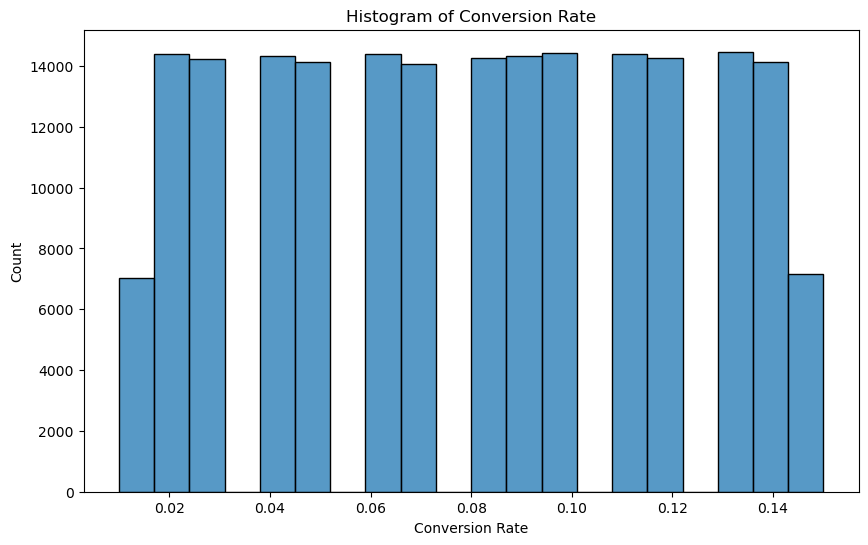

In [21]:
# Histogram of Conversion Rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Conversion_Rate', bins=20)
plt.title('Histogram of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Count')
plt.show()

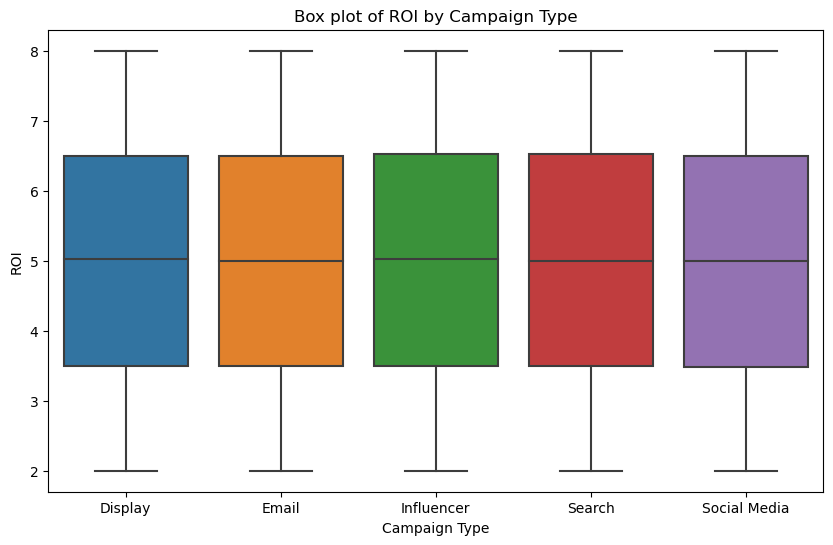

In [22]:
# Box plot of ROI by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Campaign_Type', y='ROI')
plt.title('Box plot of ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI')
plt.show()

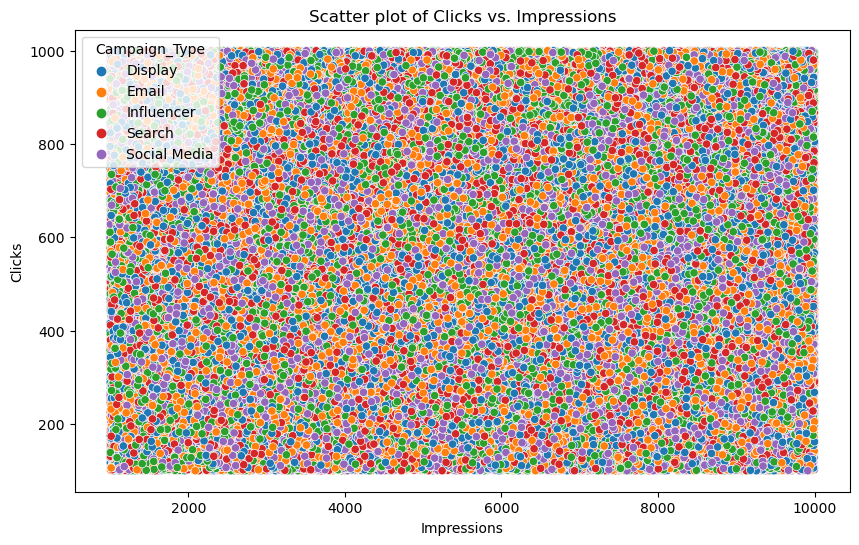

In [23]:
# Scatter plot of Clicks vs. Impressions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Campaign_Type')
plt.title('Scatter plot of Clicks vs. Impressions')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

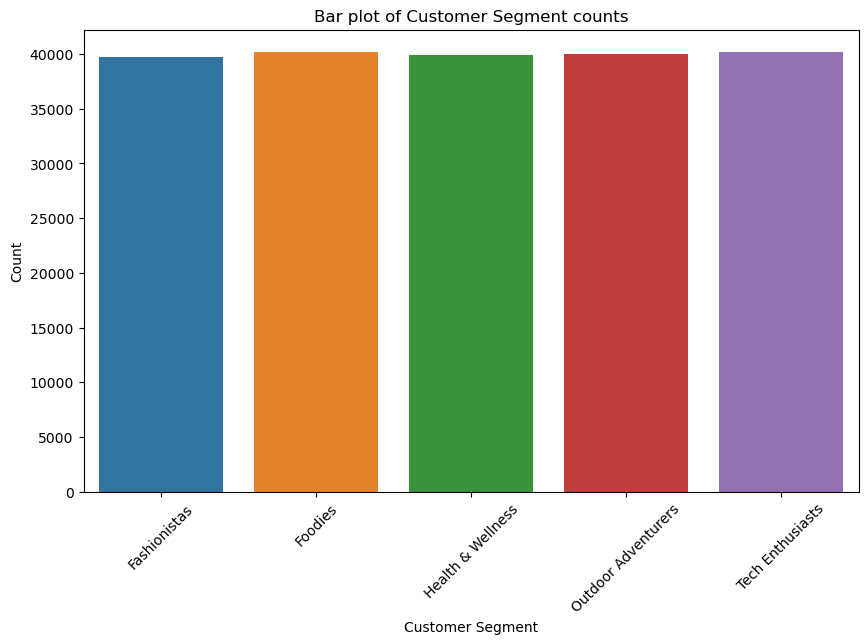

In [24]:
# Bar plot of Customer Segment counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Segment')
plt.title('Bar plot of Customer Segment counts')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

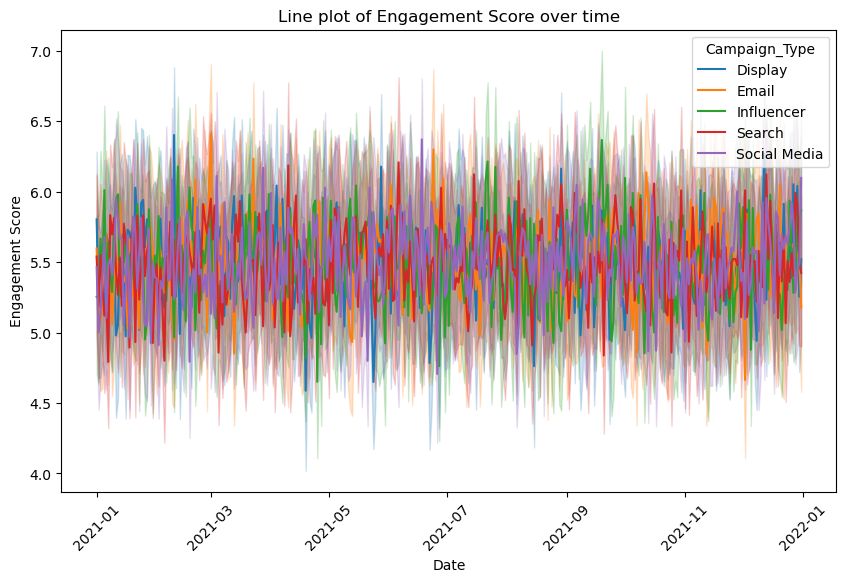

In [25]:
# Line plot of Engagement Score over time
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='Date', y='Engagement_Score', hue='Campaign_Type')
plt.title('Line plot of Engagement Score over time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

**Geographical Distribution - Map Visualization**

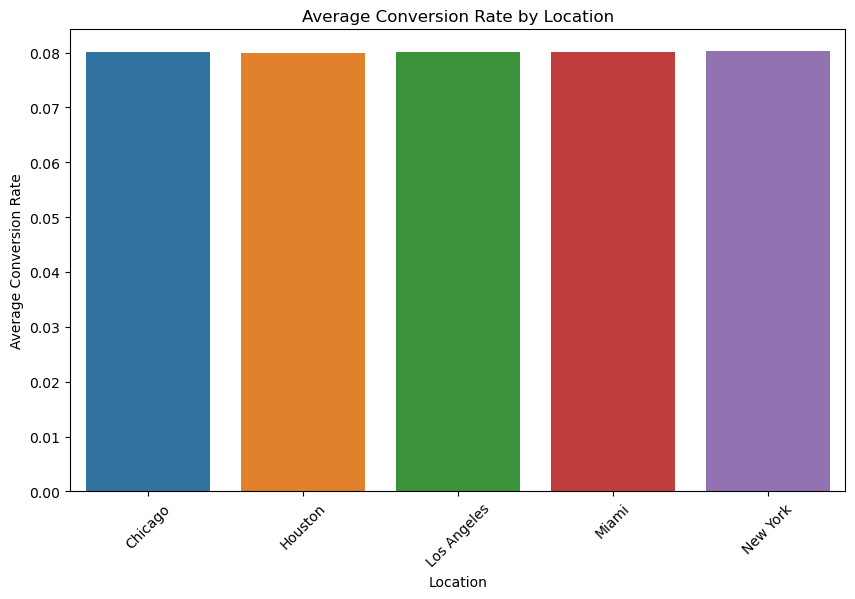

In [26]:
# Group data by location and calculate the average conversion rate
location_conversion = df.groupby('Location')['Conversion_Rate'].mean().reset_index()

# Create a map plot using the average conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(data=location_conversion, x='Location', y='Conversion_Rate')
plt.title('Average Conversion Rate by Location')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.show()

**Channel Usage - Pie Chart Visualization**

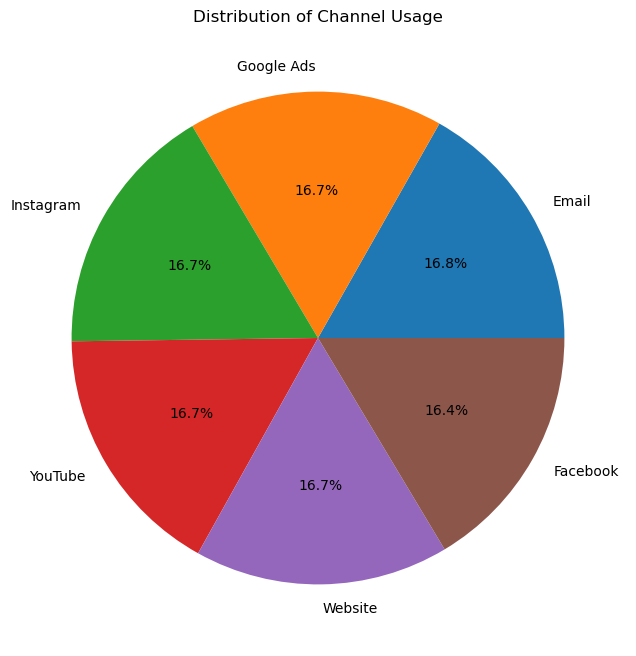

In [27]:
# Count the occurrences of each channel used
channel_counts = df['Channel_Used'].value_counts()

# Create a pie chart to visualize the distribution of channel usage
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Usage')
plt.show()

**Customer Segment Distribution - Stacked Bar Chart Visualization**

<Figure size 1000x600 with 0 Axes>

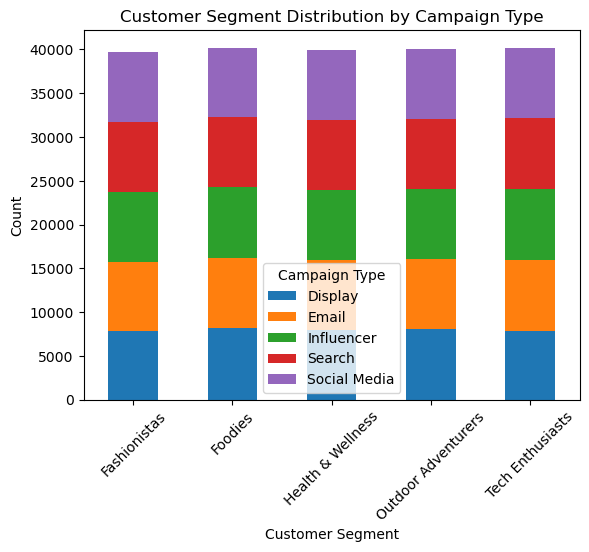

In [28]:
# Create a cross-tabulation of customer segments and campaign types
segment_campaign = pd.crosstab(df['Customer_Segment'], df['Campaign_Type'])

# Create a stacked bar chart to visualize the distribution of customer segments across campaign types
plt.figure(figsize=(10, 6))
segment_campaign.plot(kind='bar', stacked=True)
plt.title('Customer Segment Distribution by Campaign Type')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Campaign Type')
plt.show()


# Conclusion💥

In this analysis, we explored the Marketing Campaign Performance Dataset and gained valuable insights into the effectiveness of various marketing campaigns. Here are the key findings from the analysis:

* **Campaign Types:** The dataset includes various campaign types such as email, social media, influencer, display, and search. Further analysis can be conducted to evaluate the performance of each campaign type and identify the most effective ones for different customer segments.

* **Target Audience:** The dataset provides information about the specific audience segments targeted by the campaigns. Understanding the preferences and characteristics of different target audiences can help in tailoring marketing strategies to effectively engage and convert potential customers.

* **Channel Usage:** The dataset includes information about the channels used to promote the campaigns, such as email, social media platforms, YouTube, websites, and Google Ads. Analyzing channel effectiveness can help in optimizing marketing efforts by focusing on the channels that generate higher conversion rates and engagement.

* **ROI and Acquisition Cost:** The ROI (Return on Investment) and acquisition cost metrics provide insights into the profitability and cost-efficiency of the campaigns. By analyzing these metrics, marketers can identify the campaigns with the highest ROI and optimize their marketing budget allocation.

* **Customer Segments:** The dataset categorizes campaigns based on specific customer segments such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, and outdoor adventurers. Understanding the preferences and behavior of different customer segments can aid in creating personalized and targeted marketing campaigns.

By leveraging the insights gained from this analysis, marketers and data analysts can refine their marketing strategies, optimize campaign performance, and drive targeted growth. The findings from this analysis can guide data-driven decision-making and support market research efforts.


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; It is important to note that this analysis is based on a fictional dataset and should be further validated and customized based on the specific business context and objectives.
</div>
<br>